In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_json("cluster_data.json")

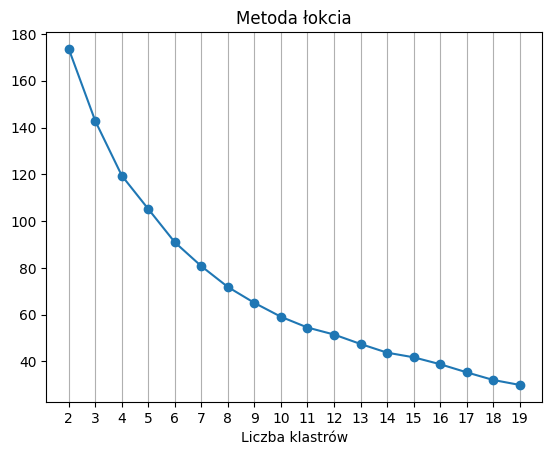

In [3]:
potencjalne_klastry = range(2, 20)
łokieć = []
for k in potencjalne_klastry:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=50)
    kmeans.fit_predict(df)
    łokieć.append(kmeans.inertia_)
plt.plot(potencjalne_klastry, łokieć, marker="o")
plt.xlabel("Liczba klastrów")
plt.title("Metoda łokcia")
plt.grid(True, axis="x")
plt.xticks(range(2, 20, 1))
plt.show()

**Silhouette dla poszczególnej ilości klastrów**

In [4]:
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=1, n_init=50)
    df["Klaster"] = kmeans.fit_predict(df)
    print(f"liczba klastórw: {i}, wynik silhouette dla niej:", silhouette_score(df.drop(columns="Klaster"), df["Klaster"]))

liczba klastórw: 2, wynik silhouette dla niej: 0.28729103550700624
liczba klastórw: 3, wynik silhouette dla niej: 0.29935830973224303
liczba klastórw: 4, wynik silhouette dla niej: 0.3350206338997242
liczba klastórw: 5, wynik silhouette dla niej: 0.378054755696188
liczba klastórw: 6, wynik silhouette dla niej: 0.39201382769637255
liczba klastórw: 7, wynik silhouette dla niej: 0.4358430345581348
liczba klastórw: 8, wynik silhouette dla niej: 0.4487335981701768
liczba klastórw: 9, wynik silhouette dla niej: 0.46600162739684287
liczba klastórw: 10, wynik silhouette dla niej: 0.4833317047543866
liczba klastórw: 11, wynik silhouette dla niej: 0.49368947870119184
liczba klastórw: 12, wynik silhouette dla niej: 0.5207864060034162
liczba klastórw: 13, wynik silhouette dla niej: 0.5300918582307133
liczba klastórw: 14, wynik silhouette dla niej: 0.5355507758836916
liczba klastórw: 15, wynik silhouette dla niej: 0.5517687071094185
liczba klastórw: 16, wynik silhouette dla niej: 0.5684100914707197

In [5]:
ilosc_klastow = 14
kmeans = KMeans(n_clusters=ilosc_klastow, random_state=1, n_init=50)
df["Klaster"] = kmeans.fit_predict(df)

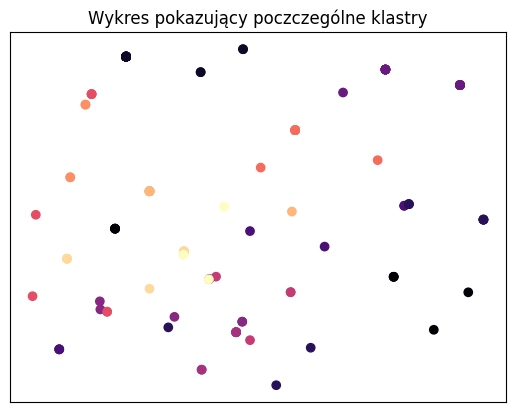

Silhouette Score:  0.46745013374653516


In [6]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns="Klaster"))
plt.scatter(df_pca[:, 1], df_pca[:, 0], c=df["Klaster"], cmap="magma", marker="o")
plt.xticks([])
plt.yticks([])
plt.title("Wykres pokazujący poczczególne klastry")
plt.show()
score = silhouette_score(df.drop(columns="Klaster"), df["Klaster"])
print("Silhouette Score: ", score)